In [72]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import pickle

In [6]:
df = pd.read_csv('./data.xls')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [7]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [8]:
df.drop([ 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'zero.15', 'zero.16', 'zero.17','zero.18'], axis=1, inplace=True)

In [9]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [14]:
df.rename({'2urvived':'Survived'}, axis=1, inplace=True)

In [15]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [21]:
df.isna().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
Survived       0
dtype: int64

In [22]:
df.shape

(1309, 9)

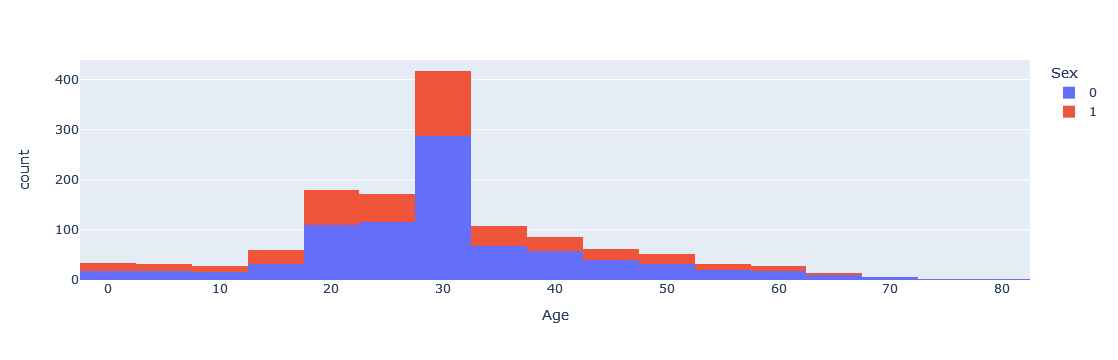

In [24]:
px.histogram(df, x='Age', color='Sex', nbins=20)

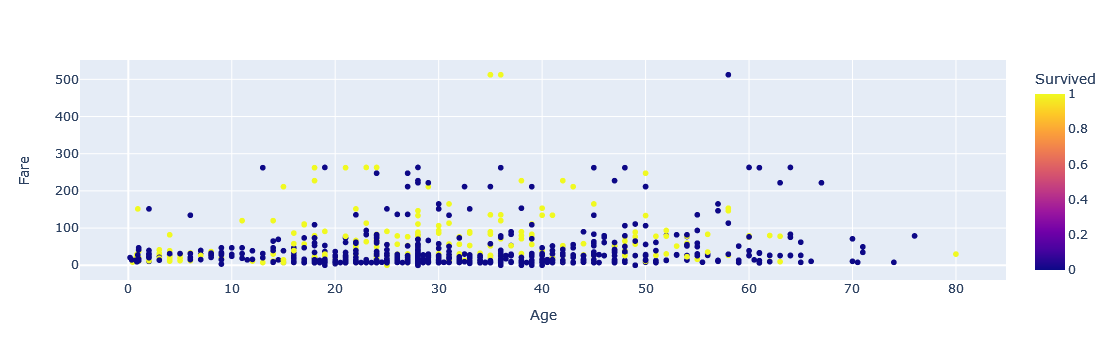

In [27]:
px.scatter(df, x='Age', y='Fare', color='Survived')

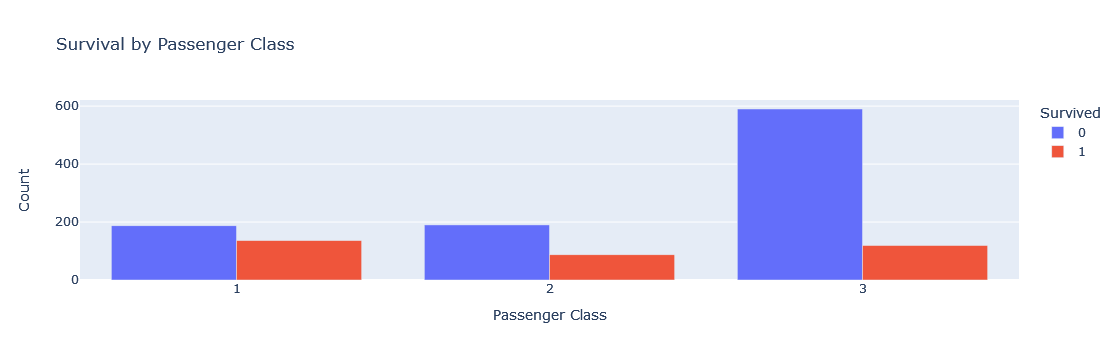

In [37]:
melted_data = pd.melt(df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0).reset_index(), id_vars=['Pclass'], value_vars=[0, 1], var_name='Survived', value_name='Count')
fig = px.bar(melted_data, x='Pclass', y='Count', color='Survived', barmode='group', 
             labels={'Pclass': 'Passenger Class', 'Survived': 'Survived', 'Count': 'Count'},
             title="Survival by Passenger Class")
fig.show()

In [39]:
df.drop(['Passengerid', 'Embarked'], axis=1, inplace=True)

In [66]:
X = df[['Age','Fare','Sex','sibsp','Parch','Pclass']]
y = df['Survived']

In [67]:
model = LogisticRegression(solver='liblinear', random_state=48)
model

LogisticRegression(random_state=48, solver='liblinear')

In [70]:
%%time
cv = cross_validate(model, X, y, return_train_score=True, return_estimator=True)

CPU times: user 69.1 ms, sys: 0 ns, total: 69.1 ms
Wall time: 67.8 ms


In [71]:
cv

{'fit_time': array([0.0057857 , 0.0047071 , 0.00541329, 0.00433302, 0.00953913]),
 'score_time': array([0.00317669, 0.00221372, 0.00402355, 0.00223398, 0.00358534]),
 'estimator': [LogisticRegression(random_state=48, solver='liblinear'),
  LogisticRegression(random_state=48, solver='liblinear'),
  LogisticRegression(random_state=48, solver='liblinear'),
  LogisticRegression(random_state=48, solver='liblinear'),
  LogisticRegression(random_state=48, solver='liblinear')],
 'test_score': array([0.79770992, 0.84732824, 0.79770992, 0.70610687, 0.72413793]),
 'train_score': array([0.7765043 , 0.7669532 , 0.76886342, 0.80802292, 0.8101145 ])}

In [74]:
with open('model.pkl','wb') as f:
    pickle.dump(cv['estimator'][1], f)